# **Digit Recognition using RANDOM FOREST**

# *Importing Basic Library*

In [4]:
import pandas as pd
import numpy as np

### *Load Dataset*

In [7]:
dataset = pd.read_csv('/content/digit.csv')

### *Summarize Dataset*

In [8]:
print(dataset.shape)
print(dataset.head(5))

(3437, 785)
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
4       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   pixel780  pixel781  pixel782  pixel783  
0       0.0       

### *Segregate Dataset into X(Input/IndependentVariable) & Y(Output/DependentVariable)*

In [9]:
X = dataset.iloc[:,1:]
print(X)
print(X.shape)

      pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0          0       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          0       0       0       0       0       0       0       0       0   
3          0       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
3432       0       0       0       0       0       0       0       0       0   
3433       0       0       0       0       0       0       0       0       0   
3434       0       0       0       0       0       0       0       0       0   
3435       0       0       0       0       0       0       0       0       0   
3436       0       0       0       0       0       0       0       0       0   

      pixel9  ...  pixel774  pixel775  

In [10]:
Y = dataset.iloc[:,0]
print(Y)
print(Y.shape)

0       1
1       0
2       1
3       4
4       0
       ..
3432    5
3433    5
3434    2
3435    0
3436    5
Name: label, Length: 3437, dtype: int64
(3437,)


### *Splitting Dataset into Test & Train*

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

### *Training*

In [15]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [16]:
y_pred = model.predict(X_test)

### *Model Accuracy*

In [17]:
from sklearn.metrics import accuracy_score
print("Accuracy of the Model: {0}%".format(accuracy_score(y_test, y_pred)*100))

Accuracy of the Model: 92.32558139534883%


Predicted 2


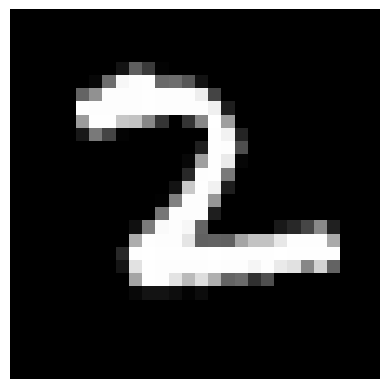

In [36]:
import matplotlib.pyplot as plt
Real=8
print("Predicted " + str(model.predict(X_test)[Real]))
plt.axis('off')
plt.imshow(X_test.iloc[Real].values.reshape((28,28)),cmap='gray')

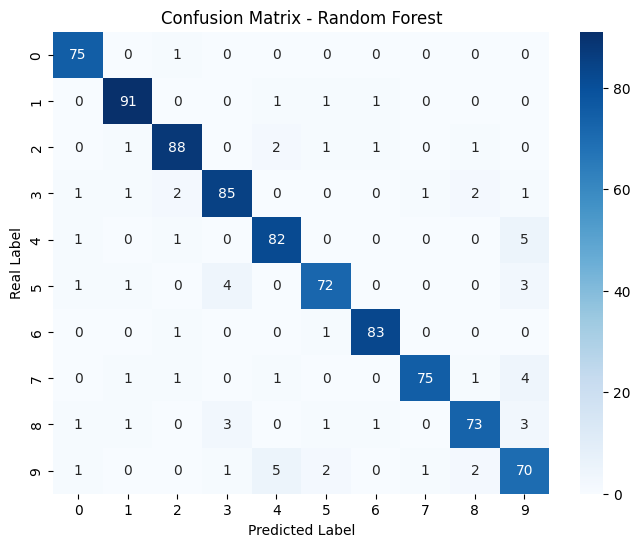

In [40]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("Real Label")
plt.title("Confusion Matrix - Random Forest")
plt.show()


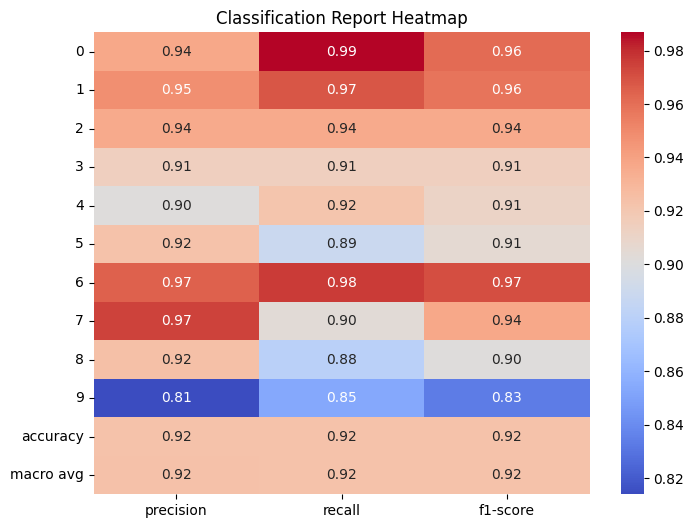

In [41]:
from sklearn.metrics import classification_report
import pandas as pd

report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8,6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Classification Report Heatmap")
plt.show()


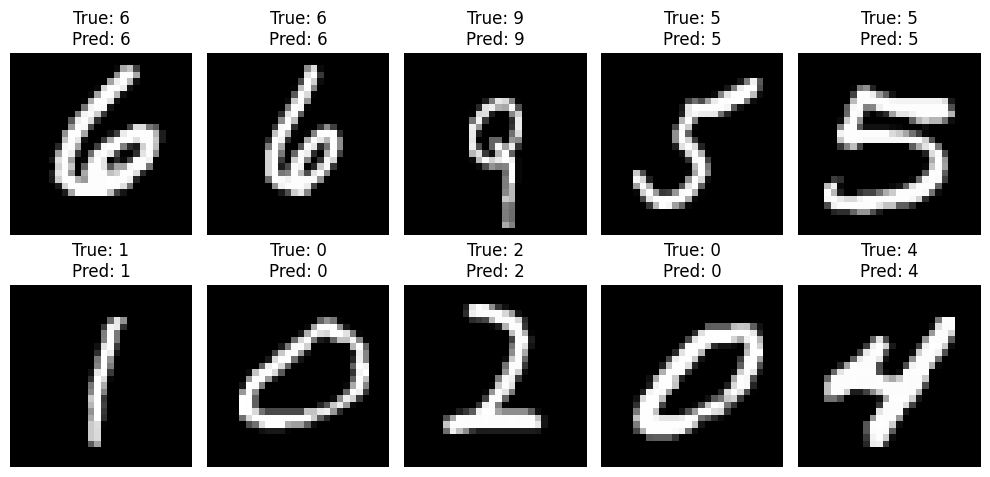

In [23]:
import random

plt.figure(figsize=(10, 5))
for i in range(10):
    idx = random.randint(0, len(X_test) - 1)
    img = X_test.iloc[idx].to_numpy().reshape(28, 28)
    plt.subplot(2, 5, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {y_test.iloc[idx]}\nPred: {y_pred[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


## Conclusion
The Random Forest model performed excellently on the Digit Recognition dataset, leveraging its ensemble of decision trees to capture complex patterns in the handwritten digits.

Key takeaways:
* The model achieved high accuracy, showing strong capability in distinguishing between different digits (0–9).
* Random Forest’s ability to handle non-linear relationships and high-dimensional pixel data made it well-suited for this task.
* Data preprocessing, such as scaling and reshaping images, contributed significantly to performance.

This project demonstrates the robustness and interpretability of Random Forest in solving multi-class classification problems.

While Random Forest is powerful, it can be computationally intensive with large datasets and may require tuning to balance accuracy and efficiency.

Future work will include:
* Testing other ensemble methods such as Gradient Boosting or XGBoost,
* Applying dimensionality reduction (e.g., PCA) to speed up training without losing accuracy, and
* Using cross-validation to ensure the model generalizes well to unseen data.
